# Data Cleaning

Spotify API feature descriptions: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

In [1]:
import spotipy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.pyplot import figure
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='3722ab8b3b6447b9be4b0a6cd9940cf3',
                                                           client_secret='ec8dc1286ee94affbc589c2a03761ea8'))

In [3]:
playlists_list = ['37i9dQZF1DXcagnSNtrGuJ?si=979ea2ec99a94898','37i9dQZF1DX0yEZaMOXna3?si=95bea77b7da94edd',
                  '37i9dQZF1DX3Sp0P28SIer?si=d95ef86aac614ad5',
                  '37i9dQZF1DX0h0QnLkMBl4?si=c1579639845e4c23','37i9dQZF1DX9ukdrXQLJGZ?si=cb172faa7feb4e77',
                  '37i9dQZF1DX8XZ6AUo9R4R?si=27a44683a10544cb', '37i9dQZF1DWTE7dVUebpUW?si=de1c1552745349c7',
                  '37i9dQZF1DXe2bobNYDtW8?si=5f54b19d0ffa4e6f', '37i9dQZF1DWVRSukIED0e9?si=255ae442ec30465c',
                  '37i9dQZF1DX7Jl5KP2eZaS?si=4fa1c7f6d57540a5', '37i9dQZF1DX18jTM2l2fJY?si=619fd3677fdd4aed'
                  ]

In [4]:
def get_songs(playlist_id):
    playlist_features_list = ["artist","album","track_name",  "track_id","popularity","danceability","energy","key",
                          "loudness","mode", "speechiness","instrumentalness","liveness","valence",
                          "tempo", "duration_ms","time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)


    playlist = sp.user_playlist_tracks("spotify", playlist_id)
    for track in playlist['tracks']['items']:
        playlist_features = {}
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        playlist_features["popularity"] = track["track"]["popularity"]
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[5:]:
            playlist_features[feature] = audio_features[feature]
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [5]:
top_2011 = get_songs(playlists_list[0])
top_2012 = get_songs(playlists_list[1])
top_2013 = get_songs(playlists_list[2])
top_2014 = get_songs(playlists_list[3])
top_2015 = get_songs(playlists_list[4])
top_2016 = get_songs(playlists_list[5])
top_2017 = get_songs(playlists_list[6])
top_2018 = get_songs(playlists_list[7])
top_2019 = get_songs(playlists_list[8])
top_2020 = get_songs(playlists_list[9])
top_2021 = get_songs(playlists_list[10])

In [6]:
years = [top_2011,top_2012,top_2013,top_2014,top_2015,top_2016,top_2017,top_2018,top_2019,top_2020,top_2021]
songs = pd.concat(years)
songs.reset_index(drop=True)
songs.head()

artist                    album  \
0       Adele                       21   
1    Maroon 5           Hands All Over   
2       LMFAO  Sorry For Party Rocking   
3  Katy Perry            Teenage Dream   
4  Bruno Mars     Doo-Wops & Hooligans   

                                          track_name                track_id  \
0                                Rolling in the Deep  1c8gk2PeTE04A1pIDH9YMk   
1  Moves Like Jagger - Studio Recording From "The...  7LcfRTgAVTs5pQGEQgUEzN   
2                                  Party Rock Anthem  0IkKz2J93C94Ei4BvDop7P   
3                                           Firework  4r6eNCsrZnQWJzzvFh4nlg   
4                                            Grenade  2tJulUYLDKOg9XrtVkMgcJ   

  popularity  danceability  energy key  loudness mode  speechiness  \
0         82         0.730   0.769   8    -5.114    1       0.0298   
1         74         0.722   0.758  11    -4.477    0       0.0471   
2         72         0.750   0.727   5    -4.210    0       0.1420   
3         74         0.638   0.832   8    -5.039    1       0.0490   
4         80         0.704   0.558   2    -7.273    0       0.0542   

  instrumentalness  liveness  valence    tempo duration_ms time_signature  
0                0    0.0473    0.507  104.948      228093              4  
1                0    0.3080    0.620  128.047      201160              4  
2                0    0.2660    0.359  129.993      262173              4  
3                0    0.1130    0.648  124.071      227893              4  
4                0    0.1070    0.245  110.444      222091              4

# EDA

<function matplotlib.pyplot.show(close=None, block=None)>

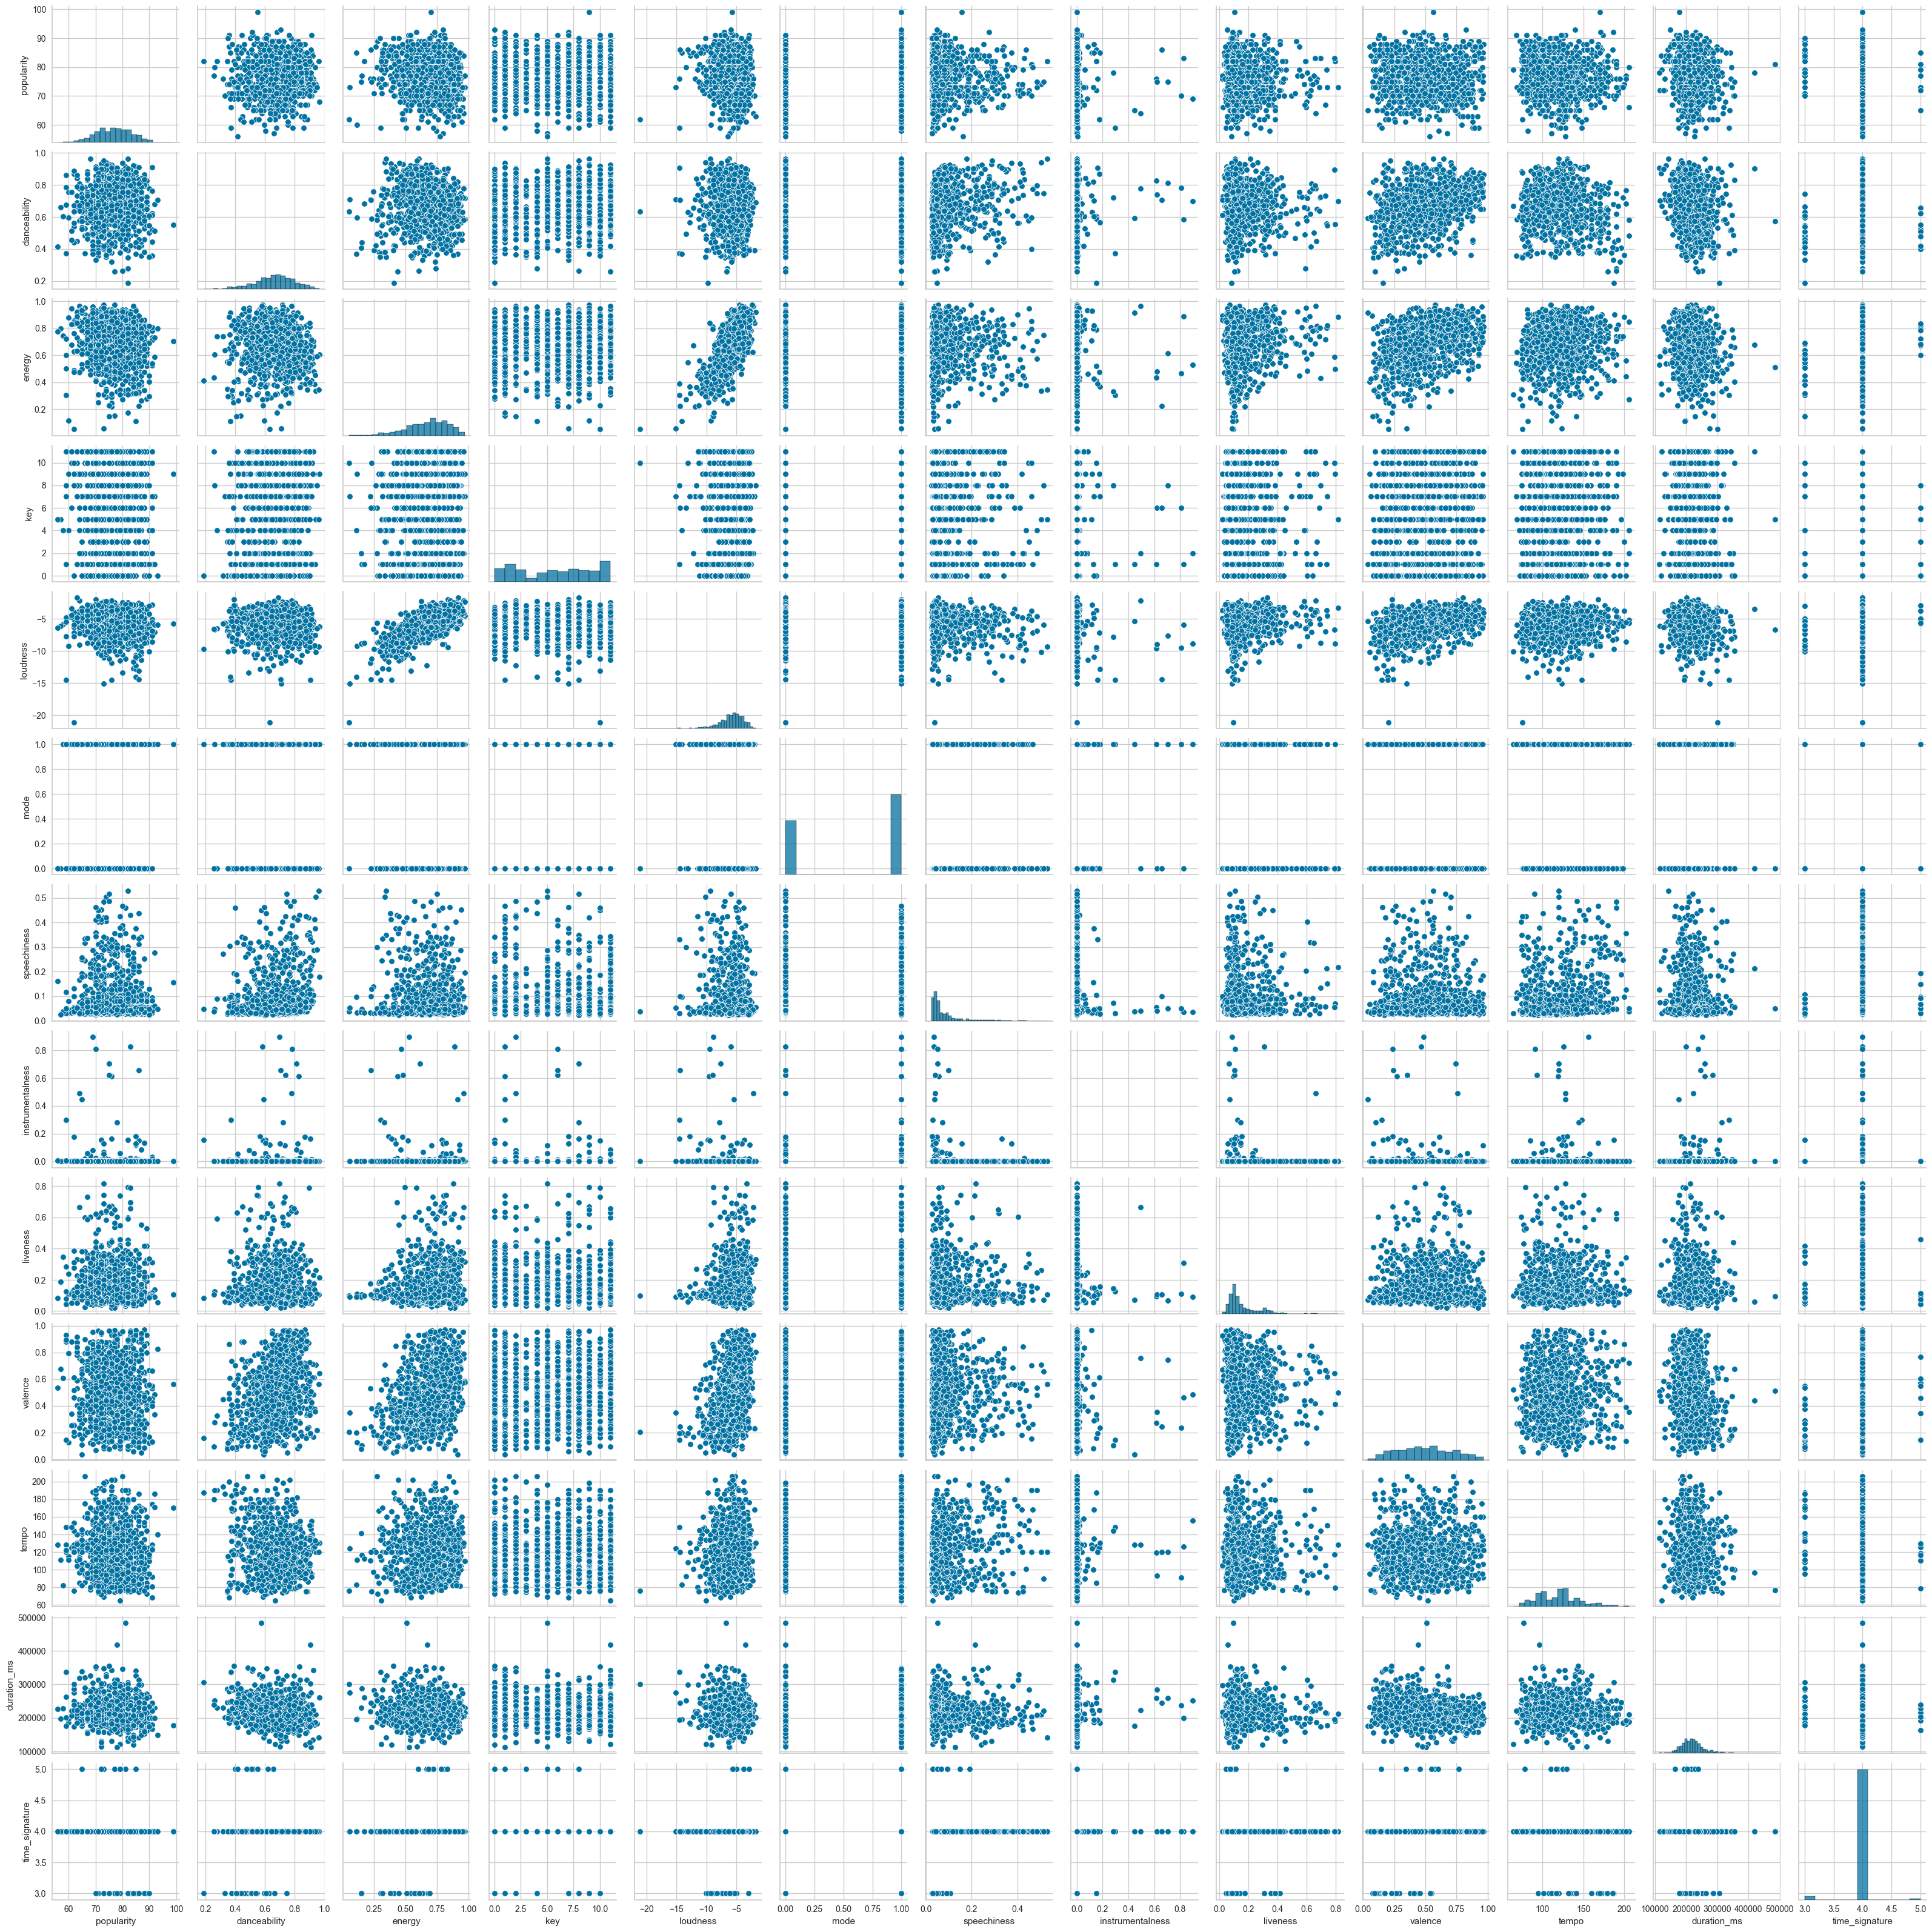

In [7]:
sns.pairplot(songs)
plt.show

(array([  9.,  27.,  72., 227., 194., 204., 193.,  60.,  13.,   1.]),
 array([56. , 60.3, 64.6, 68.9, 73.2, 77.5, 81.8, 86.1, 90.4, 94.7, 99. ]),
 <BarContainer object of 10 artists>)

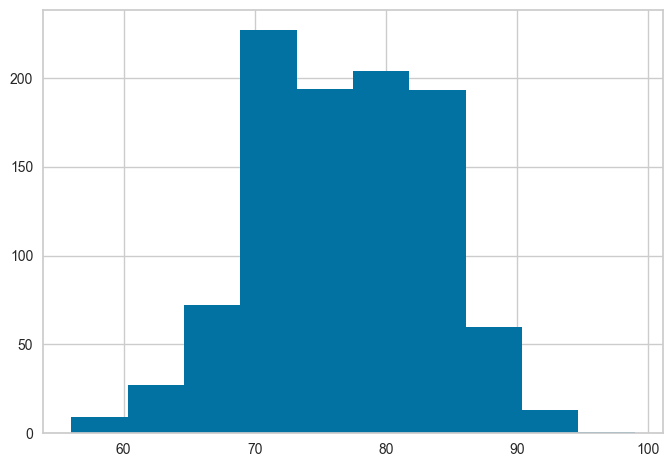

In [8]:
plt.hist(songs.popularity)

# Ridge Regression

Logistic regression accuracy score: 0.5164179104477612
Ridge accuracy score: 0.6238805970149254
Lasso accuracy score: 0.5492537313432836
Optimal alpha value: {'alpha': 6}
Final ridge model accuracy score: 0.6
           predictor   coefficient
0       danceability  7.873111e-02
1             energy  2.204662e-01
2                key  9.900498e-03
3           loudness  3.067582e-02
4               mode  3.244565e-02
5        speechiness  1.779395e-01
6   instrumentalness  1.896537e-01
7           liveness  2.763967e-02
8            valence  1.396057e-01
9              tempo  6.650497e-04
10       duration_ms  7.867803e-07
11    time_signature  9.254493e-03


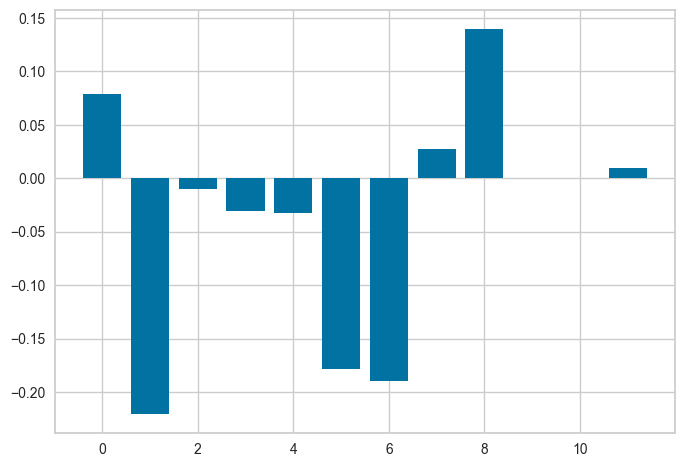

Important features: ['danceability', 'energy', 'speechiness', 'instrumentalness', 'valence']


In [9]:
#Make binary target variable
songs['popular'] = songs['popularity']>songs['popularity'].mean()
predictors = songs.drop(columns=['popular', 'popularity', 'track_id', 'track_name', 'artist', 'album'])
target = songs['popular']

#Split into test and train
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.33, random_state=42)

#Try logistic, ridge, and lasso models
logreg = LogisticRegression()
ridge = Ridge(alpha=0.2)
lasso = Lasso(alpha=0.5)
logreg.fit(X_train,y_train)
logpred = logreg.predict(X_train)
print("Logistic regression accuracy score: "+str(accuracy_score(y_train, logpred)))
ridge.fit(X_train,y_train)
ridgepred = abs(ridge.predict(X_train).round()).astype(int)
print("Ridge accuracy score: "+str(accuracy_score(y_train, ridgepred)))
lasso.fit(X_train,y_train)
lassopred = abs(lasso.predict(X_train).round()).astype(int)
print("Lasso accuracy score: "+str(accuracy_score(y_train, lassopred)))

#Hypertune parameter
parameters = {'alpha':[1,2,3,4,5,6,7,8,9,10]}
ridgereg= GridSearchCV(ridge, parameters)
ridgereg.fit(X_train,y_train)
print("Optimal alpha value: "+str(ridgereg.best_params_))

#Fit best model
model = ridgereg.best_estimator_
model.fit(X_test,y_test)
modelpred = abs(model.predict(X_test).round()).astype(int)
print("Final ridge model accuracy score: "+str(accuracy_score(y_test, modelpred)))

#Find feature importance
predictor_list = []
coef_list = []
coef_df = pd.DataFrame()

for i in range(len(predictors.columns)):
    predictor_list.append(predictors.columns[i])
    coef_list.append(abs(model.coef_[i]))
    
coef_df['predictor']=predictor_list
coef_df['coefficient']=coef_list

print(coef_df)
    
#Visualize feature importance
plt.bar([x for x in range(len(model.coef_))], model.coef_)
plt.show()

#Select features
print('Important features: '+str(coef_df[coef_df['coefficient']>=.5*(np.mean(coef_df['coefficient']))]['predictor'].values.tolist()))

# Random Forest Regression

In [10]:
#Remove target variable and drop unnecesary columns
target = songs['popularity']
target=target.astype('int')
predictors = songs.drop(columns=['popularity', 'track_id', 'track_name', 'artist', 'album'])

#Split into training and testing datasets and include only important columns
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.33, random_state=42)
X_train = X_train[['danceability', 'energy', 'speechiness', 
                    'instrumentalness', 'liveness', 'time_signature']]
X_test = X_test[['danceability', 'energy', 'speechiness', 
                    'instrumentalness', 'liveness', 'time_signature']]

#Create grid for hyperparameter tuning
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 20, num = 10)]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth }
param_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 20]}

In [11]:
rf = RandomForestRegressor(random_state=21)

#Train models on grid
grid = GridSearchCV(rf, param_grid=param_grid, cv=3)
grid_results = grid.fit(X_train, y_train)

#Fit RF on best model
rf_opt = grid_results.best_estimator_
rf_opt.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=400,
                      random_state=21)

In [12]:
y_pred_opt = rf_opt.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_opt))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_opt))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_opt)))

Mean Absolute Error: 5.461519287899955
Mean Squared Error: 43.68722296135123
Root Mean Squared Error: 6.609631076039814


# KMeans Clustering

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=29), k=(2, 30))

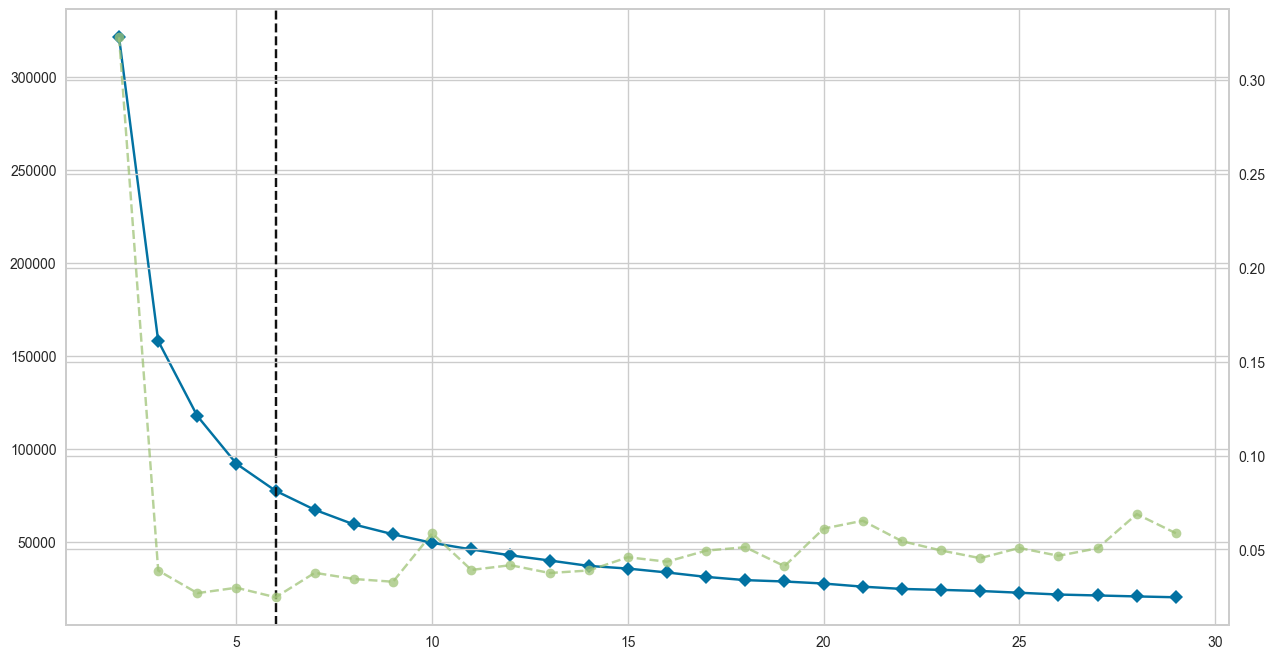

In [13]:
numeric_songs = songs[['danceability', 'energy', 'loudness', 'speechiness', 'liveness', 'valence', 'tempo', 'popularity']]
numeric_songs['popularity'] = pd.to_numeric(numeric_songs['popularity'], downcast="float")
model = KMeans()
visualizer = KElbowVisualizer(model, k = (2,30), timings = True)
plt.figure(figsize=(15,8))
visualizer.fit(numeric_songs)

##  Initial Clustering Model Comments

Initially we can see that the optimal number of clusters for this numeric spotify data set is 6 according to this elbow visualization.

In [14]:
#Fitting kmeans with proper number of clusters
km_model = KMeans(n_clusters = 6, random_state = 0).fit(numeric_songs)
#Assigning data points to clusters
labels = km_model.labels_
#Assigning cluster columns to dataframe
songs['cluster'] = labels

df = pd.DataFrame({})
for cluster in np.unique(labels):
    clust_df = songs.loc[songs['cluster']==cluster]
    temp_df = pd.DataFrame({str(cluster):{'cluster_num': str(cluster),
                      'avg_danceability':str(np.mean(clust_df[clust_df['cluster']==cluster]['danceability'])),
                      'avg_energy': str(np.mean(clust_df[clust_df['cluster']==cluster]['energy'])),
                      'avg_loundess': str(np.mean(clust_df[clust_df['cluster']==cluster]['loudness'])),
                      'avg_speechiness': str(np.mean(clust_df[clust_df['cluster']==cluster]['speechiness'])),
                      'avg_liveness': str(np.mean(clust_df[clust_df['cluster']==cluster]['liveness'])),
                      'avg_valence': str(np.mean(clust_df[clust_df['cluster']==cluster]['valence'])),
                      'avg_popularity': str(np.mean(clust_df[clust_df['cluster']==cluster]['popularity'])),                  
                      'avg_tempo': str(np.mean(clust_df[clust_df['cluster']==cluster]['tempo']))}}).transpose()
    df = pd.concat([df,temp_df])
    
df

avg_danceability          avg_energy         avg_liveness  \
0   0.684702564102564  0.6654871794871794  0.16456871794871794   
1  0.6537499999999999  0.6627750000000001             0.178735   
2            0.624144           0.6001992  0.17469679999999999   
3  0.6974600760456274  0.6764410646387833  0.16805399239543725   
4  0.5671744186046512  0.6807674418604652   0.1730267441860465   
5  0.6903508771929825   0.738312865497076   0.1777169590643275   

          avg_loundess     avg_popularity      avg_speechiness  \
0  -5.9331435897435885  82.16923076923077  0.06917128205128205   
1              -6.0178            76.8875            0.1088875   
2            -6.439976              78.24            0.1041936   
3  -5.7410988593155885  76.63117870722434  0.08737148288973384   
4   -5.634837209302326               77.5  0.16471395348837206   
5   -5.316777777777778  69.54970760233918  0.08543216374269005   

            avg_tempo          avg_valence cluster_num  
0  122.20636410256411   0.5071897435897436           0  
1        145.91953125   0.4799843749999999           1  
2           82.559872             0.474536           2  
3  100.33303422053233  0.49059467680608376           3  
4  177.34470930232558  0.47237209302325583           4  
5   125.3086842105263   0.5442356725146199           5

## Finding hidden relationships
After considering the average of values in the numeric columns and putting them into a dataframe, we can see some of the columns that may be more important in creating clusters. The larger differences between values of each cluster will show that these features are more important when considering which cluster they may belong to. For example we see that avg_tempo of clusters is quite variable. This may indicate that songs are clustered together based on this featrue. We can then consider how tempo may positively or negatively impact the popularity. I will hypothesize that speechniness and tempo will be the largest indicators of being in a certian cluster. I cannot predict what impact these values will have on popularity.

In [15]:
for columns in numeric_songs:
    fig = px.scatter(songs, x=columns, y='popularity',color='cluster', size_max=18, opacity=0.9)
    fig.show()

## Popularity Vs Features
Unfortunately, it appears that there are no super informative relationships between certain features and popularity. We can generally see a large grouping of values that have a limited shape and or relationship with popularity. This may be generally true for the features however, we see that speechiness and tempo have some sort of relationship.

For example we can see that speechiness and popularity have an interesting relationship. The higher the speechiness for a song, the more likely it is to be within the mean of popularity. On the extremes of speechiness, we can see that the song although most likely to fall about the mean of popularity, may be able to jump to the extremes of >85 popularity or <65. 

Tempo is also quite interesting when it comes to popularity and clusters. We can see that for each range of tempo, there are songs that are highly popular and songs that are less popular. We can also infer that clusters were built upon ranges of tempo due to the coloration of the graph. 

We can see that the rest of features had limited impact on cluster number or popularity. The shape of the other features indicates that songs may have any combination of these features and will still have a good shot at being very popular. This is further coroborated by 

In [16]:
for columns in numeric_songs:
    fig = px.scatter(songs, x=columns, y='cluster',color='popularity', size_max=18, opacity=0.9)
    fig.show()

In [17]:
corr_df = numeric_songs.corr()
fig = px.imshow(corr_df, text_auto = True)
fig.show()

# Write Up
Our group was very interested in analyzing music because of the amount of it that is available to the public. We were curious to find out what features about songs make them popular. Artists release music in hopes of it gaining lots of plays and making money. The issue is that artists have little idea if the song is good or will become popular. Our team hopes to alleviate this issue with a quantitative method to predict the popularity of a song using Spotify’s API. We hope to solve this issue for artists, who are often non-quantitative with a simple, straightforward method for understanding the potential popularity of songs. This may be able to save or create billions of dollars of value for artists all over the world of varying genres. 

We decided to use Spotify’s API to collect the most popular songs starting from 2011 through 2021. We opted to use an API over a datafile because we are hoping to apply the models we create to new songs that continue to come out on the Spotify platform. We know that predicting the popularity of a song changes depending on trends and what new music has been released. One major challenge was collecting the dataset we will be using for our project from Spotify’s API rather than a static CSV file, as it required us to familiarize ourselves with the API syntax in order to scrape the features we desired. 

Our specific dataset used the top songs from each of the past 10 years (2011-2021). We created a function {get_songs()} that extracts the relevant features for each song in a playlist. We then called this function on the playlist with Spotify’s top songs from each year, and then concatenated these 10 dataframes into a single dataframe. Our extraction function created fairly clean dataframes, so there was not too much data cleaning required. One action that we needed to perform was a reset of our index from 0-1000, rather than 1-100 for each year.

Next, we decided to create a binary prediction model to ask the inference question of which features have an effect on whether or not a song becomes popular. We at first were going to use a Logistic Regression model and created a binary target variable of whether a song’s popularity was above the mean (1) or below the mean (0). Once we fit this model, we decided to also use Lasso and Ridge models and noticed that the Ridge Regression model had the highest accuracy score of the three. We then used a Grid Search on this model to find the best Alpha value, which ended up being two. With this tuned model, we predicted whether or not the test set song’s would be popular or not to get a final accuracy score. We used the model’s coefficients and plotted them to select 6 features that had a relevant impact on the model. 
In order to predict popularity, we leveraged a Random Forest Regressor. We initially used unimportant features and conducted only minor hyperparameter tuning. In order to improve our model, we performed a gridsearch for the number of estimators, maximum features, and maximum depth. Additionally, we included only features that the previous Ridge Regression model determined were important predictors. After tuning, we were able to obtain a mean absolute error of 5.45. As popularity is a value between 0 and 100, this indicates that our random forest model’s error can easily be interpreted as 5.45%.

We finally decided to use a KMeans Clustering Model to find hidden relationships in the data that may be telling of what types of attributes or groups of attributes in songs make them popular. In order to properly fit a KMeans clustering model, we only considered numeric data in order to fit our model. After using the KElbowVisualizer package, we found that the optimal number of clusters was 6. Furthermore, we created a dataframe for average feature values for every cluster. This numerically showed us what features may be most influential when creating clusters. After creating this dataframe, we could see that many feature means for each cluster were very similar. For example we see that avg_tempo of clusters is quite variable. This may indicate that songs are clustered together based on tempo. We are able to visualize these relationships between cluster and the features through scatter plots. Overall, we are able to see that each cluster has a range of values for valence, liveness, speechiness, loudness, energy, and danceability. The only feature that has distinct values for each cluster is tempo which is indicative of this feature being most important when creating clusters. We can then consider how tempo may positively or negatively impact popularity. Unfortunately, it appears that there are no highly informative relationships between certain features and popularity. We can generally see a large grouping of values that have a limited shape and or relationship with popularity. The only feature to have a relationship between popularity and cluster is tempo. We can see that for each range of tempo, there are songs that are highly popular and songs that are less popular. We can also infer that clusters were built upon ranges of tempo due to the coloration of the graph. Overall, we can see that there are limited hidden relationships between popularity, each feature, and clusters.

Our biggest insight was that the features provided by Spotify’s API will struggle to provide precise insights into the popularity of the songs. Through our clustering model, we see little correlation between any of the features and popularity. Thus, it makes sense that we could not attain a mean absolute error below ~5%. We believe that this model could be useful to artists who are planning to release a song and want some insight into how well it will perform.
We all contributed equally to the project and did all of our work together in person. Each group member primarily focused on one model, although everyone contributed significantly to all models. Mitra’s focus was on the ridge regression for feature selection, Myles’ focus was the clustering algorithm, and Matt’s focus was the random forest regression for popularity prediction.